In [2]:
from sklearn import tree
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix




In [3]:
style = "<style>svg{width:50% !important;height:30% !important;}</style>"
HTML(style)
%matplotlib inline

In [4]:
cats_dataSet = pd.read_csv("./models/cats.csv")
cats_dataSet.head()


,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик


In [5]:
entropy = -(4/10) * np.log2(4/10) - (6/10) * np.log2(6/10)
entropy

0.9709505944546686

In [6]:
IG = 0.97 - (9/10 * 0.99)
IG

0.07899999999999996

In [7]:
train_iris_data = pd.read_csv("./models/train_iris.csv", index_col=0)
test_iris_data = pd.read_csv("./models/test_iris.csv", index_col=0)

In [8]:
X_train = train_iris_data.drop(['species'], axis=1)
X_test = test_iris_data.drop(['species'], axis=1)

In [9]:
y = train_iris_data.species
q = test_iris_data.species

In [10]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y)

DecisionTreeClassifier()

In [11]:
scores_data = pd.DataFrame()


In [12]:
rs = np.random.seed(0)
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y)
    train_score = clf.score(X_train, y)
    test_score = clf.score(X_test, q)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    "train_score": [train_score],
                                    "test_score": [test_score]})
    scores_data = scores_data.append(temp_score_data)

/var/folders/ny/z8d8m_m953q6v9ybw147mnj00000gn/T/ipykernel_14459/2454496347.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
/var/folders/ny/z8d8m_m953q6v9ybw147mnj00000gn/T/ipykernel_14459/2454496347.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
/var/folders/ny/z8d8m_m953q6v9ybw147mnj00000gn/T/ipykernel_14459/2454496347.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
/var/folders/ny/z8d8m_m953q6v9ybw147mnj00000gn/T/ipykernel_14459/2454496347.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [13]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [14]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"], value_vars=["train_score", "test_score"], var_name="set_type", value_name="score")

In [15]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<AxesSubplot:xlabel='max_depth', ylabel='score'>

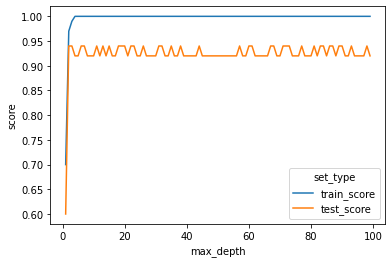

In [16]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [17]:
dog_cat_dataset = pd.read_csv('./models/dogs_n_cats.csv')

In [18]:
dog_cat_dataset.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [19]:
edited_dog_n_cat_data = pd.get_dummies(dog_cat_dataset)

In [20]:
edited_dog_n_cat_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_котик,Вид_собачка
0,15,18.0,1,1,0,0,1
1,20,24.0,1,0,0,0,1
2,34,40.8,1,1,0,0,1
3,26,31.2,1,1,0,0,1
4,16,19.2,1,1,0,0,1
...,...,...,...,...,...,...,...
995,8,3.2,1,0,1,1,0
996,7,2.8,1,0,1,1,0
997,6,2.4,1,0,1,1,0
998,7,2.8,1,0,1,1,0


In [21]:
edited_data = dog_cat_dataset.drop(["Длина", "Высота", "Вид"], axis=1)

In [22]:
edited_data.head()

,Шерстист,Гавкает,Лазает по деревьям
0,1,1,0
1,1,0,0
2,1,1,0
3,1,1,0
4,1,1,0


In [23]:
species = dog_cat_dataset.Вид


In [24]:
clf.fit(edited_data, species)

DecisionTreeClassifier(criterion='entropy', max_depth=99)

In [25]:
clf.score(edited_data, species)

0.977

In [26]:
train_data = pd.read_csv("./models/train_data_tree.csv")

In [27]:
edited_train_data = train_data.drop(["num"], axis=1)

In [28]:
prediction_const = train_data.num

In [29]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [30]:
clf.fit(edited_train_data, prediction_const)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

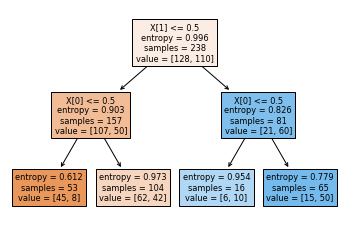

In [31]:
tree.plot_tree(clf, filled=True)

In [32]:
0.996 - (157*0.903 + 81*0.826)/(157+81)

0.11920588235294105

In [33]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
X = iris.data
y = iris.target


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)


In [36]:
dt = tree.DecisionTreeClassifier()

In [37]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
predicted = dt.predict(X_test)

In [39]:
params = {"max_depth": range(1, 10), "min_samples_split": range(2, 10), "min_samples_leaf": range(1, 10)}

In [40]:
grid_search_cv_clf = GridSearchCV(dt, params, cv=5)

In [41]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [42]:
predictions = grid_search_cv_clf.best_estimator_.predict(X)


In [43]:
matrix = confusion_matrix(y, predictions)
matrix


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [44]:
random = RandomizedSearchCV(dt, params, cv=5)

In [45]:
random.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [46]:
random.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=4)

In [47]:
heart_rate_data = pd.read_csv('./models/heart_cleveland_upload.csv')
heart_rate_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [48]:
y = heart_rate_data.condition

In [49]:
heart_rate_data = heart_rate_data.drop(["condition"], axis=1)

In [50]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=5)

In [51]:
rf_clf.fit(heart_rate_data, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [52]:
feature_importance = rf_clf.feature_importances_

In [53]:
feature_importance_df = pd.DataFrame({"feauters":list(heart_rate_data),
                                      'feauter_importance': feature_importance})

<AxesSubplot:>

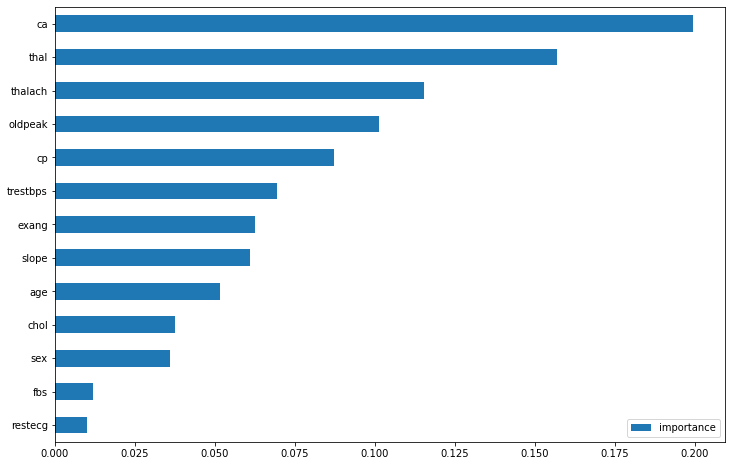

In [54]:
imp = pd.DataFrame(rf_clf.feature_importances_, index=heart_rate_data.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [55]:
mashroom_data = pd.read_csv('./models/training_mush.csv')
mashroom_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [56]:
y = mashroom_data['class']
mashroom_data = mashroom_data.drop(columns=["class"])

In [57]:
rf_clf_mush = RandomForestClassifier(random_state=0)

In [58]:
params_mush = {"n_estimators": range(10, 50, 10), "max_depth": range(1, 12, 2), "min_samples_leaf": range(1, 7), "min_samples_split": range(2, 9, 2)}

In [59]:
grid_search_cv_rf_clf_mush = GridSearchCV(rf_clf_mush, params_mush, cv=3, n_jobs=-1)

In [60]:
grid_search_cv_rf_clf_mush.fit(mashroom_data, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [61]:
rf_clf_mush.fit(mashroom_data, y)

RandomForestClassifier(random_state=0)

In [62]:
grid_search_cv_rf_clf_mush.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [63]:
rf_clf_mush.feature_importances_

array([0.00504667, 0.00945415, 0.01466471, 0.07169127, 0.1352064 ,
       0.00100954, 0.04906516, 0.11332963, 0.0813746 , 0.02099985,
       0.0638954 , 0.05912506, 0.04882223, 0.01249844, 0.01786969,
       0.        , 0.00501178, 0.01078377, 0.07236688, 0.10054025,
       0.07359177, 0.03365274])

<AxesSubplot:>

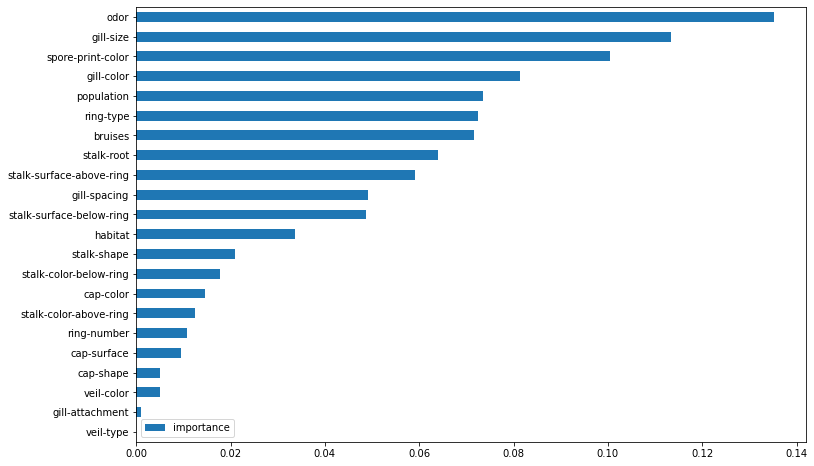

In [64]:
imp = pd.DataFrame(rf_clf_mush.feature_importances_, index=mashroom_data.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [65]:
mush_test_data = pd.read_csv('./models/testing_mush.csv')

In [66]:
predictions_mush = grid_search_cv_rf_clf_mush.predict(mush_test_data)

In [67]:
unique, counts = np.unique(predictions_mush, return_counts=True)

result = np.column_stack((unique, counts))
result

array([[   0, 1055],
       [   1,  976]])

In [68]:
testing_y_data_mush = pd.read_csv("./models/testing_y_mush.csv")

In [69]:
testing_y_data_mush = testing_y_data_mush['class']

In [70]:
matrix = confusion_matrix(testing_y_data_mush, predictions_mush)
matrix


array([[1055,    0],
       [   0,  976]])

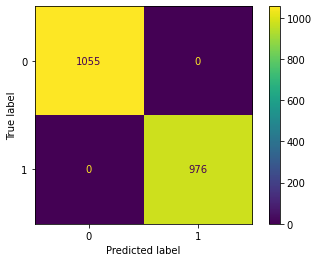

In [71]:
ConfusionMatrixDisplay.from_predictions(testing_y_data_mush, predictions_mush)

In [85]:
invasion_data = pd.read_csv("./models/invasion.csv")
invasion_data.dtypes

class                  object
g_reflection          float64
i_reflection          float64
speed                 float64
brightness            float64
time_of_observance      int64
volume                float64
dtype: object

In [73]:
invasion_test_data = pd.read_csv("./models/operative_information.csv")

In [84]:
invasion_test_data.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [74]:
y_invasion = invasion_data['class']
invasion_data_train = invasion_data.drop(columns=["class"], axis=1)

In [75]:
rf_clf_invasion = RandomForestClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=0)

In [76]:
rf_clf_invasion.fit(invasion_data_train, y_invasion)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

In [77]:
params_invasion = {"n_estimators": range(10, 50, 10), "max_depth": range(1, 12, 2), "min_samples_leaf": range(1, 7), "min_samples_split": range(2, 9, 2)}

In [78]:
grid_invasion_rf = GridSearchCV(rf_clf_invasion, params_invasion, cv=5, n_jobs=-1)

In [79]:
grid_invasion_rf.fit(invasion_data_train, y_invasion)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [80]:
predictions_invasion = grid_invasion_rf.predict(invasion_test_data)

In [81]:
grid_invasion_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [82]:
unique, counts = np.unique(predictions_invasion, return_counts=True)

result = np.column_stack((unique, counts))
result

array([['cruiser', 230],
       ['fighter', 675],
       ['transport', 595]], dtype=object)

<AxesSubplot:>

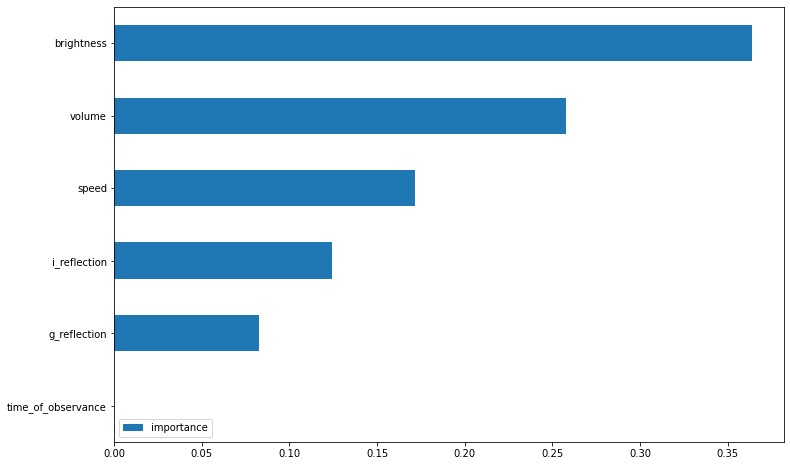

In [83]:
imp = pd.DataFrame(rf_clf_invasion.feature_importances_, index=invasion_data_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))